<a href="https://colab.research.google.com/github/farmnote-holdings/palette-analytics-r/blob/master/kanai/Introduction_to_Anomaly_Detection/2_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Rの有効化
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
install.packages("car")
library("car")

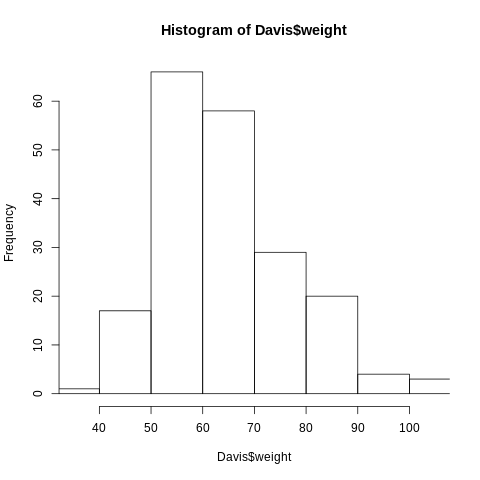

In [ ]:
%%R
data(Davis)
Davis
hist(Davis$weight, xlim = c(35, 105), breaks = 14)

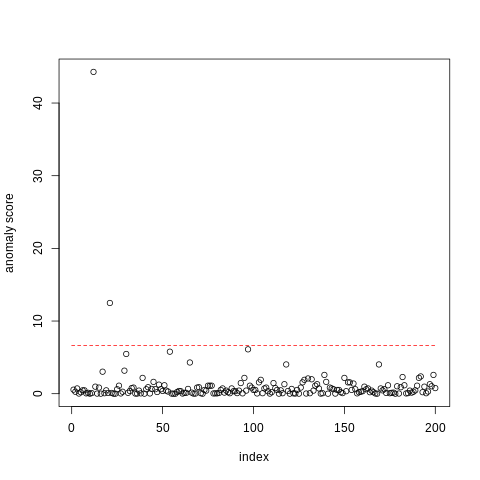

In [ ]:
%%R
mu <- mean(Davis$weight)
s2 <- mean((Davis$weight - mu) ^ 2)
c(mu, s2)

a <- (Davis$weight - mu) ^ 2 / s2
# カイ二乗分布（自由度1, スケール因子1）から1%水準の閾値の算出
# `自由度1, スケール因子1` であるのは、p.20の定理2.1から
th <- qchisq(0.99, 1)
plot(a, xlab = "index", ylab = "anomaly score")
lines(0:200, rep(th, length(0:200)), col = "red", lty = 2)
